<a href="https://colab.research.google.com/github/aviscki/AlgoritmosIA/blob/main/KNNArvore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# 2. CARREGAMENTO DO DATASET
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
# 3. EXPLORAÇÃO INICIAL
print(df['target'].value_counts())
print(df.describe())

target
1    357
0    212
Name: count, dtype: int64
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.01938

In [5]:
# 4. PRÉ-PROCESSAMENTO
X = df.drop('target', axis=1)
y = df['target']

In [7]:
# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Divisão treino/teste (70/30)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
# 5. MODELO 1: ÁRVORE DE DECISÃO
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_tree))

Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        64
           1       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

Matriz de Confusão:
[[ 57   7]
 [  7 100]]


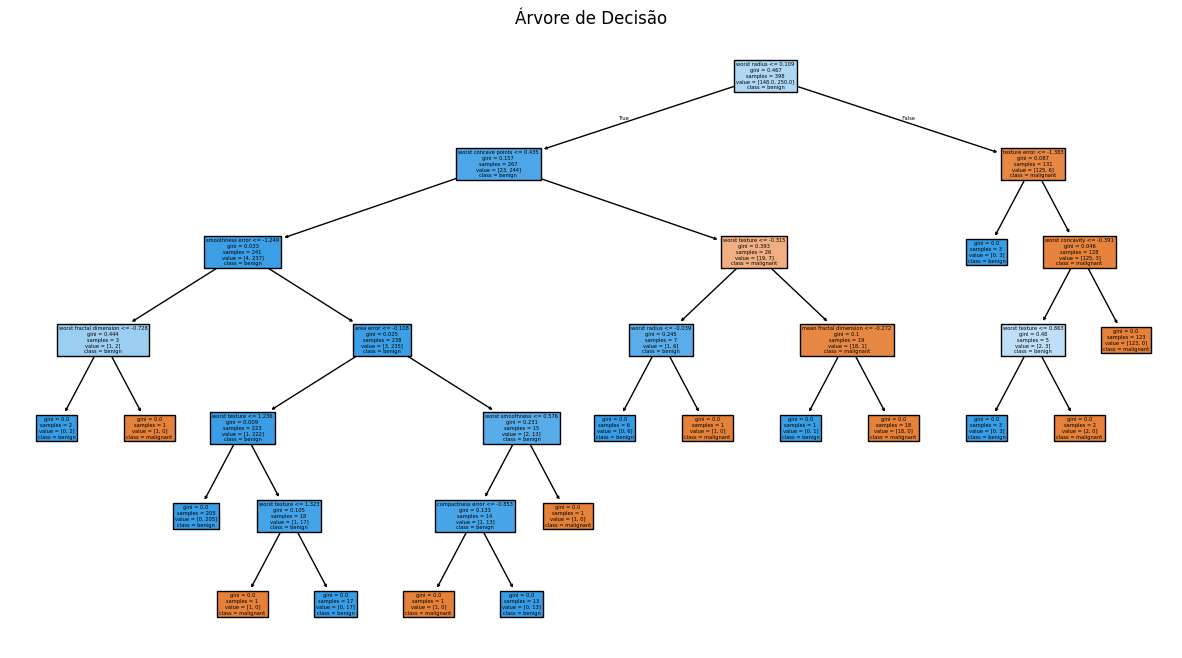

In [10]:
# Visualização da Árvore
plt.figure(figsize=(15, 8))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Árvore de Decisão")
plt.show()

In [12]:
# 6. MODELO 2: K-NEAREST NEIGHBORS (com busca do melhor K)
params = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid.fit(X_train, y_train)
best_k = grid.best_params_['n_neighbors']
print(f"Melhor valor de K: {best_k}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN:")
print(classification_report(y_test, y_pred_knn))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_knn))

Melhor valor de K: 5
KNN:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Matriz de Confusão:
[[ 59   5]
 [  0 107]]


In [13]:
# 7. COMPARAÇÃO
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"Acurácia Árvore: {acc_tree:.4f}")
print(f"Acurácia KNN: {acc_knn:.4f}")

Acurácia Árvore: 0.9181
Acurácia KNN: 0.9708


In [14]:
# 8. CONCLUSÃO
if acc_tree > acc_knn:
    print("A Árvore de Decisão teve melhor desempenho.")
elif acc_knn > acc_tree:
    print("O KNN teve melhor desempenho.")
else:
    print("Ambos os modelos tiveram desempenho semelhante.")

O KNN teve melhor desempenho.


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculando métricas
metrics = {
    'Modelo': ['Árvore de Decisão', 'KNN'],
    'Acurácia': [accuracy_score(y_test, y_pred_tree), accuracy_score(y_test, y_pred_knn)],
    'Precisão': [precision_score(y_test, y_pred_tree), precision_score(y_test, y_pred_knn)],
    'Recall': [recall_score(y_test, y_pred_tree), recall_score(y_test, y_pred_knn)],
    'F1-Score': [f1_score(y_test, y_pred_tree), f1_score(y_test, y_pred_knn)]
}

results_df = pd.DataFrame(metrics)
print(results_df)

              Modelo  Acurácia  Precisão    Recall  F1-Score
0  Árvore de Decisão  0.918129  0.934579  0.934579  0.934579
1                KNN  0.970760  0.955357  1.000000  0.977169


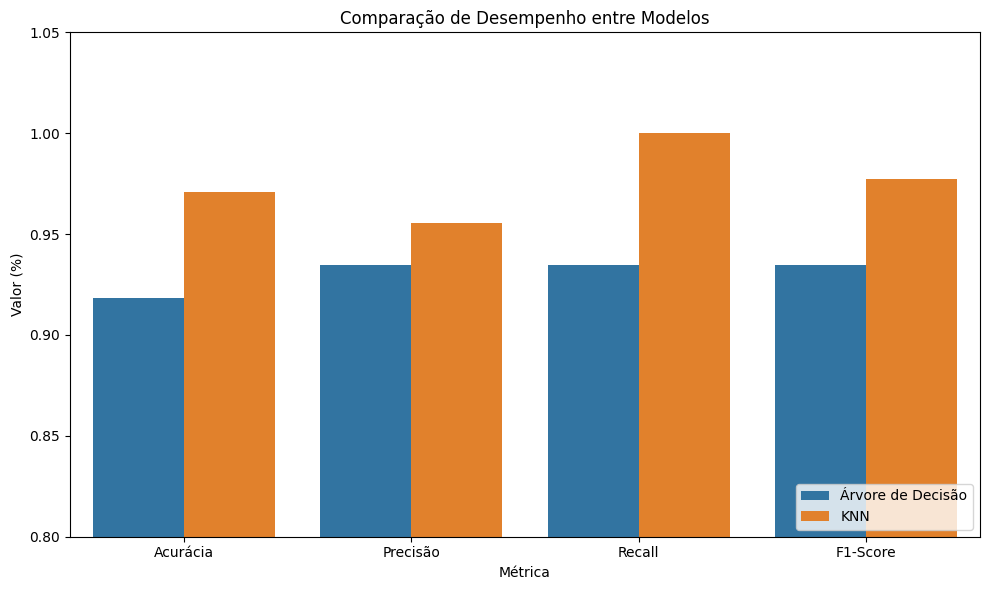

In [16]:
# Derretendo o DataFrame para facilitar o uso no seaborn
df_plot = results_df.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Métrica', y='Valor', hue='Modelo')
plt.title('Comparação de Desempenho entre Modelos')
plt.ylim(0.8, 1.05)
plt.ylabel('Valor (%)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()